In [29]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __sigmoid(self, z):
        # Prevent overflow problem
        h = np.zeros(len(z))
        for i in range(len(z)):
            if z[i]<0: 
                h[i] = np.exp(z[i]) / (1 + np.exp(z[i]))
            else: 
                h[i] = 1 / (1 + np.exp(-z[i]))
        return h
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __loss(self, h, y, eps=1e-15):
        # clip predicted probability to avoid taking the logarithm of 0
        h = np.clip(h, eps, 1 - eps)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose and i % 1000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')
    
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold


In [27]:
# since this file is big, we provide an glance here
data = pd.read_csv('data/emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Email 4996,20,6,3,1,1,1,34,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,Email 4997,0,7,1,0,0,0,20,1,1,...,0,0,0,1,0,0,0,0,0,0
4997,Email 4998,6,8,1,3,2,1,64,7,1,...,0,0,0,0,0,0,0,0,0,0
4998,Email 4999,8,6,2,5,6,1,51,4,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('data/emails.csv')

# Prepare features and labels
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Initialize logistic regression model
lr = LogisticRegression(lr=0.01, num_iter=10000, verbose=True)

# Initialize the KFold cross validator
kf = KFold(n_splits=5, shuffle=False, random_state= None)

# Initialize lists to store the evaluation metrics
accuracies = []
precisions = []
recalls = []

# the splits of datasets:
# – Fold 1, test set: Email 1-1000, training set: the rest (Email 1001-5000)
# – Fold 2, test set: Email 1000-2000, training set: the rest
# – Fold 3, test set: Email 2000-3000, training set: the rest
# – Fold 4, test set: Email 3000-4000, training set: the rest
# – Fold 5, test set: Email 4000-5000, training set: the rest

# Perform 5-fold cross validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    # Split the data into training and validation sets for this fold
    X_fold_train, y_fold_train = X.iloc[train_idx], y.iloc[train_idx]
    X_fold_val, y_fold_val = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit logistic regression model
    lr.fit(X_fold_train, y_fold_train)

    # Evaluate the logistic regression model on the validation set for this fold
    y_pred_val = lr.predict(X_fold_val)

    # Calculate the evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)

    # Print the evaluation metrics for this fold
    print(f"Fold {fold+1}: accuracy={accuracy}, precision={precision}, recall={recall}")

    # Add the evaluation metrics for this fold to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Calculate the average evaluation metrics over all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)

# Print the average evaluation metrics over all folds
print(f"Average: accuracy={avg_accuracy}, precision={avg_precision}, recall={avg_recall}")

Loss: 6.091169416927005 	
Loss: 0.57610002881996 	
Loss: 0.4632548944094907 	
Loss: 0.26076273269380024 	
Loss: 0.20936087566078002 	
Loss: 0.19368372909864698 	
Loss: 0.13585208994783368 	
Loss: 0.16370645886982754 	
Loss: 0.07848374071241648 	
Loss: 0.0877810372650722 	
Fold 1: accuracy=0.957, precision=0.926056338028169, recall=0.9228070175438596
Loss: 6.058509926629093 	
Loss: 0.6548849272088677 	
Loss: 0.5001811229119283 	
Loss: 0.2820386823447203 	
Loss: 0.215410988026658 	
Loss: 0.16481517576575822 	
Loss: 0.12835454378310776 	
Loss: 0.15118058492310288 	
Loss: 0.08637053383554981 	
Loss: 0.0713356120084617 	
Fold 2: accuracy=0.954, precision=0.9261992619926199, recall=0.9061371841155235
Loss: 6.39231822205347 	
Loss: 0.9746331590286681 	
Loss: 4.046927354140446 	
Loss: 0.23743050211720396 	
Loss: 0.16308120794454772 	
Loss: 0.1357328502007749 	
Loss: 0.15593323297432163 	
Loss: 0.09799960521233121 	
Loss: 1.154889302241028 	
Loss: 0.07215394549841614 	
Fold 3: accuracy=0.94, pr

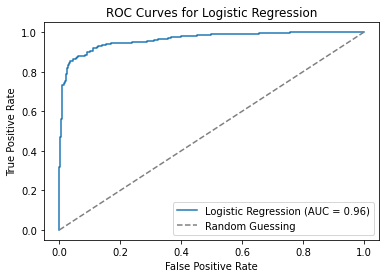

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/emails.csv')
X_train = data.iloc[:4000, 1:-1]
y_train = data.iloc[:4000, -1]
X_test = data.iloc[4000:, 1:-1]
y_test = data.iloc[4000:, -1]

# Train logistic regression
lr = LogisticRegression(lr=0.01)
lr.fit(X_train, y_train)

# Calculate predicted probabilities for logistic regression
y_hat_lr = lr.predict_proba(X_test)

# Calculate the false positive rate, true positive rate, and threshold for Logistic regression
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, y_hat_lr)

# Calculate the AUC (area under the curve) for logistic regression
logreg_auc = roc_auc_score(y_test, y_hat_lr)

# Plot the ROC curves
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend()
plt.show()